# What is audio data?

Audio data represents analog sounds in a digital form, preserving the main properties of the original. As we know from school lessons in physics, a sound is a wave of vibrations traveling through a medium like air or water and finally reaching our ears. It has three key characteristics to be considered when analyzing audio data — time period, amplitude, and frequency.
- Time period is how long a certain sound lasts or, in other words, how many seconds it takes to complete one cycle of vibrations.
- Amplitude is the sound intensity measured in decibels (dB) which we perceive as loudness.
- Frequency measured in Hertz (Hz) indicates how many sound vibrations happen per second. People interpret frequency as low or high pitch.

# Audio data file formats

Similar to texts and images, audio is unstructured data meaning that it’s not arranged in tables with connected rows and columns. Instead, you can store audio in various file formats like

- WAV or WAVE (Waveform Audio File Format) developed by Microsoft and IBM. It’s a lossless or raw file format meaning that it doesn’t compress the original sound recording;
- AIFF (Audio Interchange File Format) developed by Apple. Like WAV, it works with uncompressed audio;
- FLAC (Free Lossless Audio Codec) developed by Xiph.Org Foundation that offers free multimedia formats and software tools. FLAC files are compressed without losing sound quality.
- MP3 (mpeg-1 audio layer 3) developed by the Fraunhofer Society in Germany and supported globally. It’s the most common file format since it makes music easy to store on portable devices and send back and forth via the Internet. Though mp3 compresses audio, it still offers an acceptable sound quality.

We recommend using aiff and wav files for analysis as they don’t miss any information present in analog sounds. At the same time, keep in mind that neither of those and other audio files can be fed directly to machine learning models. To make audio understandable for computers, data must undergo a transformation.

# Read audio data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
print(os.listdir('../input/speech-recognition-and-speaker-diarization'))

['meeting-clip2.wav', 'meeting-clip1.mp3']


In [5]:
import IPython.display as ipd
fname1 = '../input/speech-recognition-and-speaker-diarization/' + 'meeting-clip2.wav'
ipd.Audio(fname1)

In [6]:
fname2 = '../input/speech-recognition-and-speaker-diarization/' + 'meeting-clip1.mp3'
ipd.Audio(fname2)

In [8]:
# Using wave library
import wave
wav = wave.open(fname1)
print('Sampling (frame) rate = ', wav.getframerate())
print('Total samples (frames) = ', wav.getnframes())
print('Duaration = ', wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  44100
Total samples (frames) =  882000
Duaration =  20.0


# Audio data transformation basics to know

#### A waveform is a basic visual representation of an audio signal that reflects how an amplitude changes over time. The graph displays the time on the horizontal (X) axis and the amplitude on the vertical (Y) axis but it doesn’t tell us what’s happening to frequencies.

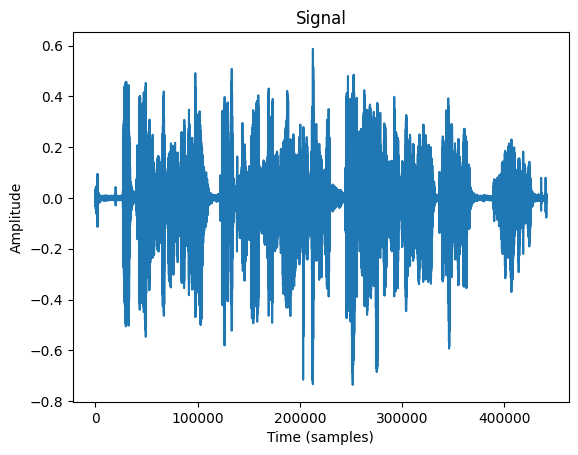

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
y, sr = librosa.load('../input/speech-recognition-and-speaker-diarization/' + 'meeting-clip2.wav')
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

#### A spectrum or spectral plot is a graph where the X-axis shows the frequency of the sound wave while the Y-axis represents its amplitude. This type of sound data visualization helps you analyze frequency content but misses the time component.

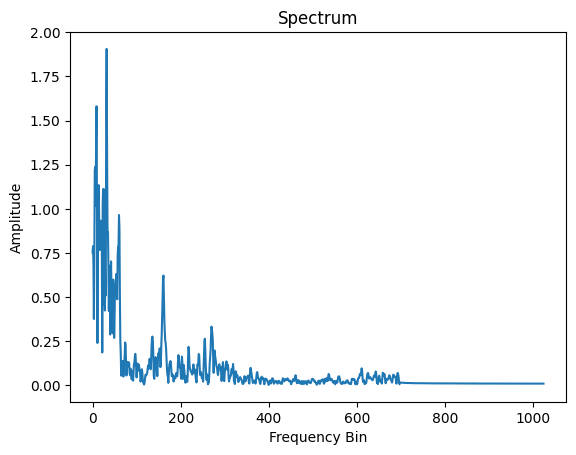

In [12]:
import numpy as np
n_fft = 2048
ft = np.abs(librosa.stft(waveform[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

#### A spectrogram is a detailed view of a signal that covers all three characteristics of sound. You can learn about time from the x-axis, frequencies from the y-axis, and amplitude from color. The louder the event the brighter the color, while silence is represented by black. Having three dimensions on one graph is very convenient: it allows you to track how frequencies change over time, examine the sound in all its fullness, and spot various problem areas (like noises) and patterns by sight.

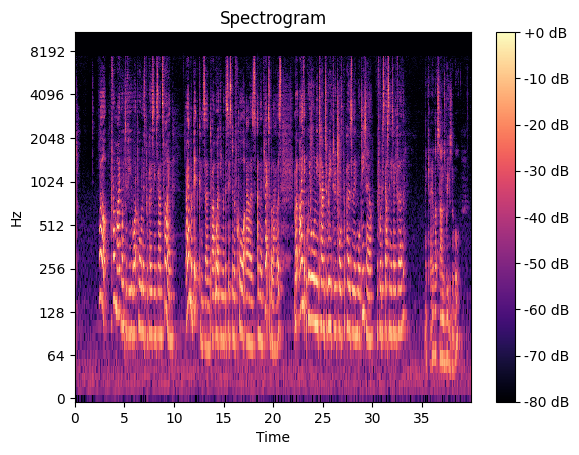

In [16]:
spec = np.abs(librosa.stft(waveform, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

### Fourier transform (FT)
The Fourier transform (FT) is a mathematical function that breaks a signal into spikes of different amplitudes and frequencies. We use it to convert waveforms into corresponding spectrum plots to look at the same signal from a different angle and perform frequency analysis. It’s a powerful instrument to understand signals and troubleshooting errors in them.

### Fast Fourier Transform (FFT) 
The Fast Fourier Transform (FFT) is the algorithm computing the Fourier transform.

### Short-Tme Fourier transform (STFT)
The short-time Fourier transform (STFT) is a sequence of Fourier transforms converting a waveform into a spectrogram.

# Audio analysis software
Of course, you don’t need to perform transformations manually. Neither need you to understand the complex mathematics behind FT, STFT, and other techniques used in audio analysis. All these and many other tasks are done automatically by audio analysis software that in most cases supports the following operations:

- import audio data
- add annotations (labels),
- edit recordings and split them into pieces,
- remove noise,
- convert signals into corresponding visual representations (waveforms, spectrum plots, spectrograms, mel spectrograms),
- do preprocessing operations,
- analyze time and frequency content,
- extract audio features and more.

### Here is the list of the most popular tools used in audio analysis.
- Audacity is a free and open-source audio editor to split recordings, remove noise, transform waveforms to spectrograms, and label them. Audacity doesn’t require coding skills. Yet, its toolset for audio analysis is not very sophisticated. For further steps, you need to load your dataset to Python or switch to a platform specifically focusing on analysis and/or machine learning.
- Tensorflow-io package for preparation and augmentation of audio data lets you perform a wide range of operations — noise removal, converting waveforms to spectrograms, frequency, and time masking to make the sound clearly audible, and more. The tool belongs to the open-source TensorFlow ecosystem, covering end-to-end machine learning workflow. So, after preprocessing you can train an ML model on the same platform.
- Librosa is an open-source Python library that has almost everything you need for audio and music analysis. It enables displaying characteristics of audio files, creating all types of audio data visualizations, and extracting features from them, to name just a few capabilities.
- Audio Toolbox by MathWorks offers numerous instruments for audio data processing and analysis, from labeling to estimating signal metrics to extracting certain features. It also comes with pre-trained machine learning and deep learning models that can be used for speech analysis and sound recognition.

# Audio data analysis steps
1. Obtain project-specific audio data stored in standard file formats.
2. Prepare data for your machine learning project, using software tools
3. Extract audio features from visual representations of sound data.
4. Select the machine learning model and train it on audio features.


# Voice and sound data acquisition
You have three options to obtain data to train machine learning models: use free sound libraries or audio datasets, purchase it from data providers, or collect it involving domain experts.
- Sound libraries: Freesound, BigSoundBank
- Audio datasets: AudioSet by Google

# Audio data preparation
- Audio data labeling
- Audio data preprocessing
 + Framing 
     * Framing means cutting the continuous stream of sound into short pieces (frames) of the same length (typically, of 20-40 ms) for further segment-wise processing.
 + Windowing 
     * Windowing is a fundamental audio processing technique to minimize spectral leakage — the common error that results in smearing the frequency and degrading the amplitude accuracy. There are several window functions (Hamming, Hanning, Flat Top, etc) applied to different types of signals, though the Hanning variation works well for 95 percent of cases.
     * Basically, all windows do the same thing: reduce or smooth the amplitude at the start and the end of each frame while increasing it at the center to preserve the average value.
 + Overlap-add (OLA) 
     * Overlap-add (OLA) method prevents losing vital information that can be caused by windowing. OLA provides 30-50 percent overlap between adjacent frames, allowing to modify them without the risk of distortion. In this case, the original signal can be accurately reconstructed from windows.

# Feature extraction
Audio features or descriptors are properties of signals, computed from visualizations of preprocessed audio data. They can belong to one of three domains
- time domain represented by waveforms,
- frequency domain represented by spectrum plots, and
- time and frequency domain represented by spectrograms.

### Time-domain features
As we mentioned before, time domain or temporal features are extracted directly from original waveforms. Notice that waveforms don’t contain much information on how the piece would really sound. They indicate only how the amplitude changes with time. In the image below we can see that the air condition and siren waveforms look alike, but surely those sounds would not be similar.

Now let’s move to some key features we can draw from waveforms.
- Short-time energy (STE) 
    + Short-time energy (STE) shows the energy variation within a short speech frame.
    + It’s a powerful tool to separate voiced and unvoiced segments.

- Root mean square energy (RMSE) 
    + Root mean square energy (RMSE) gives you an understanding of the average energy of the signal. It can be computed from a waveform or a spectrogram. In the first case, you’ll get results faster. Yet, a spectrogram provides a more accurate representation of energy over time. RMSE is particularly useful for audio segmentation and music genre classification.
- Zero-crossing Rate (ZCR) 
    + Zero-crossing Rate (ZCR) counts how many times the signal wave crosses the horizontal axis within a frame. It’s one of the most important acoustic features, widely used to detect the presence or absence of speech, and differentiate noise from silence and music from speech.
   
### Frequency domain features
Frequency-domain features are more difficult to extract than temporal ones as the process involves converting waveforms into spectrum plots or spectrograms using FT or STFT. Yet, it’s the frequency content that reveals many important sound characteristics invisible or hard to see in the time domain.

The most common frequency domain features include

- mean or average frequency,
- median frequency when the spectrum is divided into two regions with equal amplitude,
- signal-to-noise ratio (SNR) comparing the strength of desired sound against the background nose,
- band energy ratio (BER) depicting relations between higher and lower frequency bands. In other words. it measures how low frequencies are dominant over high ones.

Of course, there are numerous other properties to look at in this domain. To recap, it tells us how the sound energy spreads across frequencies while the time domain shows how a signal change over time.

### Time-frequency domain features
This domain combines both time and frequency components and uses various types of spectrograms as a visual representation of a sound. You can get a spectrogram from a waveform applying the short-time Fourier transform.

This domain combines both time and frequency components and uses various types of spectrograms as a visual representation of a sound. You can get a spectrogram from a waveform applying the short-time Fourier transform.

One of the most popular groups of time-frequency domain features is mel-frequency cepstral coefficients (MFCCs). They work within the human hearing range and as such are based on the mel scale and mel spectrograms we discussed earlier.

https://www.altexsoft.com/blog/audio-analysis/